In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


base_test = "base_test"
base_train = "base_train"

In [3]:
facematrix = []
facelabel = []

for folder in os.listdir(base_train):
    L = os.scandir(base_train + "/" + folder)
    for img in L:
        nom = img.name
        path = base_train + "/" + folder + "/" + nom
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (200, 200))
        facematrix.append(img.flatten())
        facelabel.append(folder + "_" + nom)
        
facematrix = np.array(facematrix)

In [4]:
pca = PCA().fit(facematrix)

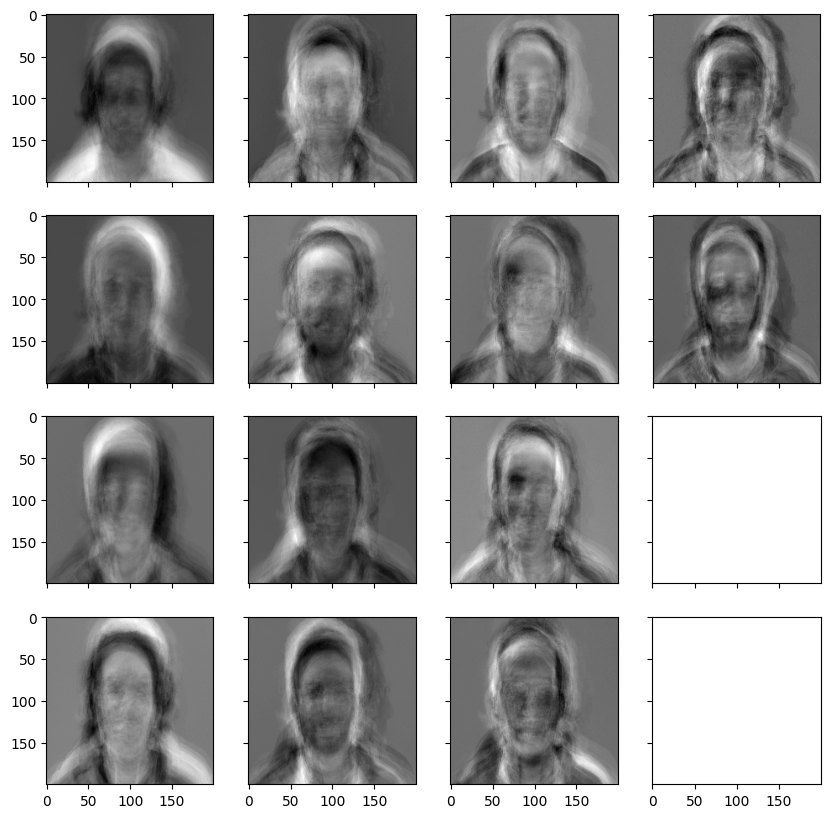

In [16]:
n_components = 14
eigenfaces = pca.components_[:n_components]

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(10,10))
for i in range(14):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(200,200), cmap="gray")
plt.show()


In [6]:
weights = []
for i in range(facematrix.shape[0]):
    weight = []
    for j in range(n_components):
        w = eigenfaces[j] @ (facematrix[i] - pca.mean_)
        weight.append(w)
    weights.append(weight)

print(weights)
print(len(weights))

[[1367.4200096093755, 2739.928063422404, 2038.636884928756, -910.5690986522521, 1844.7881152174966, -515.8299505731405, 2575.5383106452714, -2386.7011274731894, -244.39201226375468, -154.65593028982062, 202.80363633338504, 1015.8720697205283, 264.3774458437465, 527.2197736466292], [521.6430255372325, -114.9104807038281, 2650.1601633928663, 2089.26184212819, -988.5875817431031, -1785.4910914327265, 3726.3038693458616, 568.7460306429807, 96.09876290663789, -46.565652202743934, 1138.2770766932958, -2169.216992930247, -1179.598541784109, 728.5319104864493], [-1960.0904139309562, 1496.6350676718846, 2793.725344629108, -1307.83113147952, -4496.4413893552755, -70.3006694409072, 2680.186285775695, 1802.4040357875722, -718.6733286438798, -2700.263515110742, -476.1037496181538, -1106.1099939410697, 150.6678357996223, -857.9925270993804], [-3500.4783852572846, 947.42242612833, -1908.7477753795606, -1343.3158950981497, 996.5661186681681, -131.11132125165318, 23.214924192208116, -1214.8402478278506

Best match 9_IMG_2461.jpg with Euclidean distance 0.000000


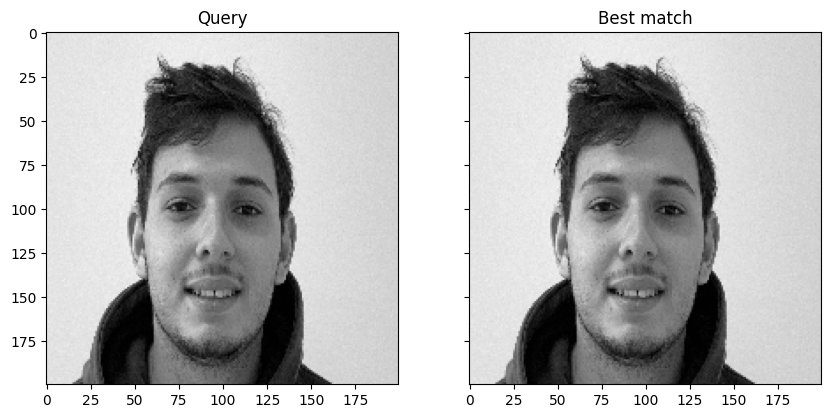

In [7]:
faceshape = (200, 200)

query = facematrix[102]
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = []
for weight in weights:
    euclidean_distance.append(np.linalg.norm(weight - query_weight, axis=0))
best_match = euclidean_distance.index(min(euclidean_distance))

print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()



In [8]:
facematrix_test = []
facelabel_test = []

for folder in os.listdir(base_test):
    L = os.scandir(base_test + "/" + folder)
    for img in L:
        nom = img.name
        path = base_test + "/" + folder + "/" + nom
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (200, 200))
        facematrix_test.append(img.flatten())
        facelabel_test.append(folder + "_" + nom)
        
facematrix_test = np.array(facematrix_test)

In [19]:
def get_class(label):
    classe = ""
    nombre = "1234567890"
    for i in range(2):
        if label[i] in nombre:
            classe += label[i]
    return classe

In [23]:
cara_list = [str(i) for i in range(1, 15)]
mat_conf = np.zeros((len(cara_list), len(cara_list)))
taille = 3

total = len(facematrix_test)
sucsses = 0
for i in range(len(facematrix_test)):
    query = facematrix_test[i]
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = []
    for weight in weights:
        euclidean_distance.append(np.linalg.norm(weight - query_weight, axis=0))
    best_match = euclidean_distance.index(min(euclidean_distance))
    print("Image réel:" + facelabel_test[i] + "\t Best Match: " + facelabel[best_match])
    if facelabel[best_match][0:2] == facelabel_test[i][0:2]:
        sucsses += 1
    classe_predi = get_class(facelabel[best_match])
    classe_reel = get_class(facelabel_test[i])
    mat_conf[cara_list.index(classe_reel)][cara_list.index(classe_predi)] += 1/taille


acc = sucsses/total*100
print(acc)




Image réel:1_IMG_2543.jpg	 Best Match: 12_IMG_2489.jpg
Image réel:1_IMG_2547.jpg	 Best Match: 1_IMG_2548.jpg
Image réel:1_IMG_2549.jpg	 Best Match: 1_IMG_2550.jpg
Image réel:10_IMG_2466.jpg	 Best Match: 10_IMG_2470.jpg
Image réel:10_IMG_2469.jpg	 Best Match: 10_IMG_2473.jpg
Image réel:10_IMG_2472.jpg	 Best Match: 10_IMG_2473.jpg
Image réel:11_IMG_2477.jpg	 Best Match: 11_IMG_2475.jpg
Image réel:11_IMG_2482.jpg	 Best Match: 11_IMG_2481.jpg
Image réel:11_IMG_2484.jpg	 Best Match: 11_IMG_2483.jpg
Image réel:12_IMG_2490.jpg	 Best Match: 12_IMG_2489.jpg
Image réel:12_IMG_2493.jpg	 Best Match: 12_IMG_2494.jpg
Image réel:12_IMG_2496.jpg	 Best Match: 12_IMG_2497.jpg
Image réel:13_IMG_2501.jpg	 Best Match: 13_IMG_2507.jpg
Image réel:13_IMG_2504.jpg	 Best Match: 13_IMG_2503.jpg
Image réel:13_IMG_2506.jpg	 Best Match: 13_IMG_2505.jpg
Image réel:14_IMG_2532.jpg	 Best Match: 14_IMG_2537.jpg
Image réel:14_IMG_2535.jpg	 Best Match: 14_IMG_2539.jpg
Image réel:14_IMG_2536.jpg	 Best Match: 14_IMG_2539.j

Best match 12_IMG_2497.jpg with Euclidean distance 502.600901


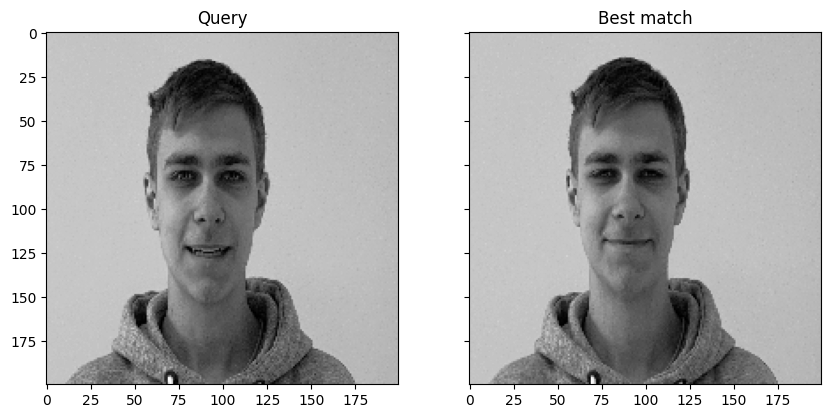

In [10]:
query = facematrix_test[11]
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = []
for weight in weights:
    euclidean_distance.append(np.linalg.norm(weight - query_weight, axis=0))
best_match = euclidean_distance.index(min(euclidean_distance))

print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

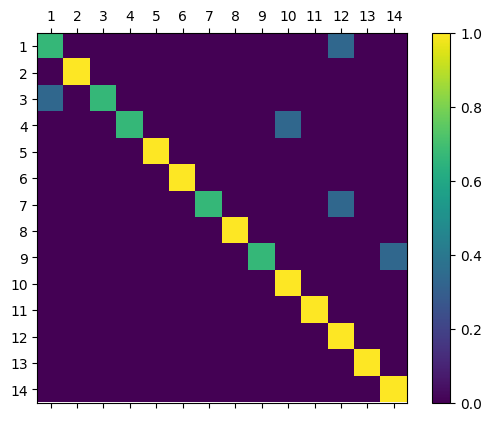

In [24]:
label = [i for i in cara_list]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mat_conf)
fig.colorbar(cax)
xaxis = np.arange(len(label))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.show()